In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('./winequality-red.csv', delimiter=";")

# Assuming the dataset is already loaded in a DataFrame called 'df'
# First, split into train and temp (combining validation and test sets)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# Split the temp set further into validation and test sets
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [15]:
# Separate the features and the target variable
X_train = train_df.drop(columns=['quality']).values  # All columns except 'quality'
y_train = train_df['quality'].values  # Target variable (quality)

X_validation = validation_df.drop(columns=['quality']).values  # All columns except 'quality'
y_validation = validation_df['quality'].values  # Target variable (quality)

X_test = test_df.drop(columns=['quality']).values  # All columns except 'quality'
y_test = test_df['quality'].values  # Target variable (quality)

# Function to compute the closed-form solution for linear regression
def closed_form_solution(X, y):
    # Add an intercept (bias) term to X (column of ones)
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Calculate the weights using the closed-form solution: w = (X^T * X)^(-1) * X^T * y
    w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    
    return w

# Function to make predictions using the learned weights
def predict(X, w):
    # Add intercept (bias) term to X
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Predict using the weights: y_pred = X_bias * w
    return X_bias @ w

# Train the linear regression model
weights = closed_form_solution(X, y)

# Print the learned weights
print("Learned weights:", weights)

# Predict using the model
predictions = predict(X, weights)

# Output the first few predictions and actual values for comparison
for i in range(5):
    print(f"Predicted: {predictions[i]:.2f}, Actual: {y[i]}")


Learned weights: [ 2.19652084e+01  2.49905527e-02 -1.08359026e+00 -1.82563948e-01
  1.63312698e-02 -1.87422516e+00  4.36133331e-03 -3.26457970e-03
 -1.78811638e+01 -4.13653144e-01  9.16334413e-01  2.76197699e-01]
Predicted: 5.03, Actual: 5
Predicted: 5.14, Actual: 5
Predicted: 5.21, Actual: 5
Predicted: 5.69, Actual: 6
Predicted: 5.03, Actual: 5


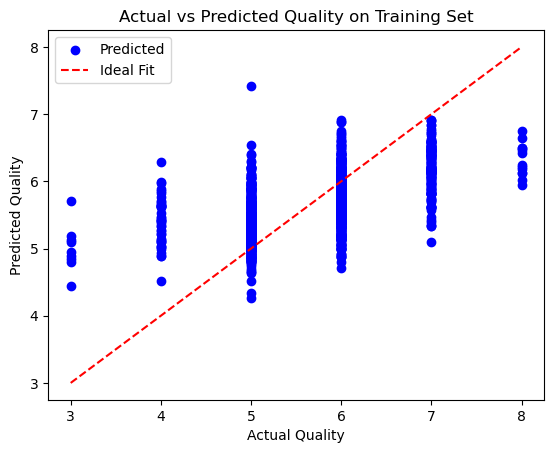

In [9]:
import matplotlib.pyplot as plt

# Train the linear regression model on the training data
weights_train = closed_form_solution(X_train, y_train)

# Make predictions on the training data
y_train_pred = predict(X_train, weights_train)

# Plot actual vs predicted target values for the training data
plt.scatter(y_train, y_train_pred, color='blue', label='Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality on Training Set')
plt.legend()
plt.show()

# Interpretation:
# - If the points lie close to the red dashed line, the model is predicting the target variable well.
# - Deviations from the line indicate prediction errors.


In [10]:
from sklearn.metrics import mean_squared_error

# Compute RMSE on the training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Make predictions on the test data
y_test_pred = predict(X_test, weights_train)

# Compute RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE on Training Set: {rmse_train:.2f}")
print(f"RMSE on Test Set: {rmse_test:.2f}")

RMSE on Training Set: 0.65
RMSE on Test Set: 0.62


In [11]:
def least_mean_squares(X, y, stepsize=0.001, iterations=1000):
    # Add intercept (bias) term to X
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Randomly initialize weights
    w = np.random.randn(X_bias.shape[1])
    
    # Perform iterations
    for i in range(iterations):
        # Compute the gradient of the loss function
        gradient = -2 * X_bias.T @ (y - X_bias @ w) / len(y)
        # Update weights using the gradient and the step size
        w = w - stepsize * gradient
        
    return w

# Train the model using LMS algorithm
weights_lms = least_mean_squares(X_train, y_train, stepsize=0.001, iterations=10000)

# Make predictions on the training and test data
y_train_pred_lms = predict(X_train, weights_lms)
y_test_pred_lms = predict(X_test, weights_lms)


/var/folders/d9/rchwt02n0qv6j2h3sf_wz_pr0000gn/T/ipykernel_7981/3150249489.py:11: RuntimeWarning: invalid value encountered in matmul
  gradient = -2 * X_bias.T @ (y - X_bias @ w) / len(y)
/var/folders/d9/rchwt02n0qv6j2h3sf_wz_pr0000gn/T/ipykernel_7981/3150249489.py:13: RuntimeWarning: invalid value encountered in subtract
  w = w - stepsize * gradient


In [12]:
# Compute RMSE on the training set using LMS
rmse_train_lms = np.sqrt(mean_squared_error(y_train, y_train_pred_lms))

# Compute RMSE on the test set using LMS
rmse_test_lms = np.sqrt(mean_squared_error(y_test, y_test_pred_lms))

print(f"RMSE on Training Set (LMS): {rmse_train_lms:.2f}")
print(f"RMSE on Test Set (LMS): {rmse_test_lms:.2f}")


ValueError: Input contains NaN.